<a href="https://colab.research.google.com/github/DhruvMehta-code/artificial-neural-network/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# All the Libraries regarding NN and Data Frame Manipulation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras import Input 
from keras.layers import LSTM, Dense, Activation , Flatten, Reshape, SimpleRNN, Dropout, Conv1D,MaxPooling1D, ZeroPadding1D
from keras.callbacks import Callback,EarlyStopping, ModelCheckpoint

In [5]:
# Reading Dataset
df = pd.read_csv("/content/star_classification.csv") #if you are using in your machine , you need to change file path or just remove "/content/"

In [6]:
# First 5 rows of dataset
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [7]:
# information of dataset with datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [8]:
# Statiscal Information with transpose Matrix
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [9]:
# Checking Unique Values
df.nunique()

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

In [10]:
# dropping Unnecesarry Values
df = df.drop(columns=["obj_ID", "rerun_ID"])

In [11]:
# Encoding Target Columns
encode = LabelEncoder()
df['class'] = encode.fit_transform(df['class'])
df['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

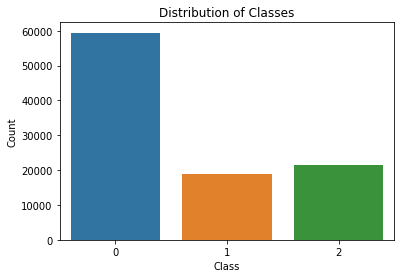

In [12]:
# Counting Plot
sns.countplot(data=df, x='class')
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [13]:
# Finding Correlation
df.corr()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,0.019582,-0.165577,-0.002553,-0.011756,0.001667,-0.002554,0.019943,0.030464
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,0.032565,-0.173416,0.112329,0.014452,0.031638,0.112329,0.107333,0.028250
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,0.003548,-0.008374,0.029997,-0.024645,0.014309,0.029997,0.031997,0.016305
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,0.003508,-0.008852,0.039443,-0.020066,0.022954,0.039443,0.040274,0.017470
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,0.008480,-0.026423,0.655245,-0.076766,0.433241,0.655243,0.671180,0.223106
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,0.007615,-0.026679,0.661641,0.015028,0.492383,0.661640,0.672523,0.214787
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,0.003365,-0.008903,0.037813,-0.001614,0.030380,0.037813,0.037469,0.014668
run_ID,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,-0.047098,0.031498,0.239460,-0.036014,0.065400,0.239459,0.262687,0.067165
cam_col,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,-0.047098,1.000000,-0.015684,-0.001946,0.023138,0.000097,-0.001949,-0.006745,0.121597
field_ID,-0.165577,-0.173416,-0.008374,-0.008852,-0.026423,-0.026679,-0.008903,0.031498,-0.015684,1.000000,-0.083471,-0.034833,-0.021331,-0.083471,-0.095064,-0.012337


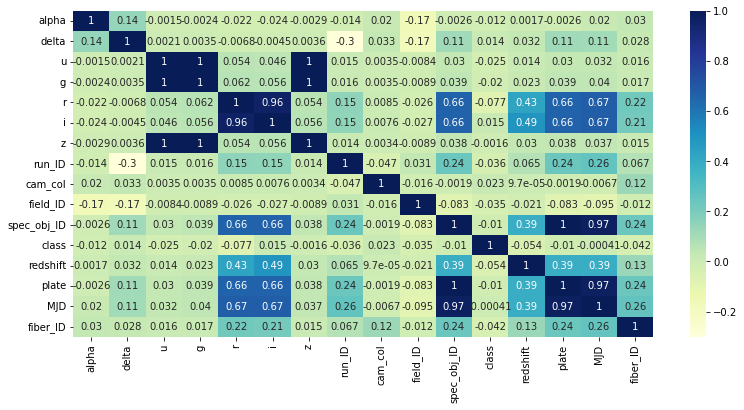

In [14]:
# Correalation Heatmap
plt.figure(figsize=(13,6))
dataplot = sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True)


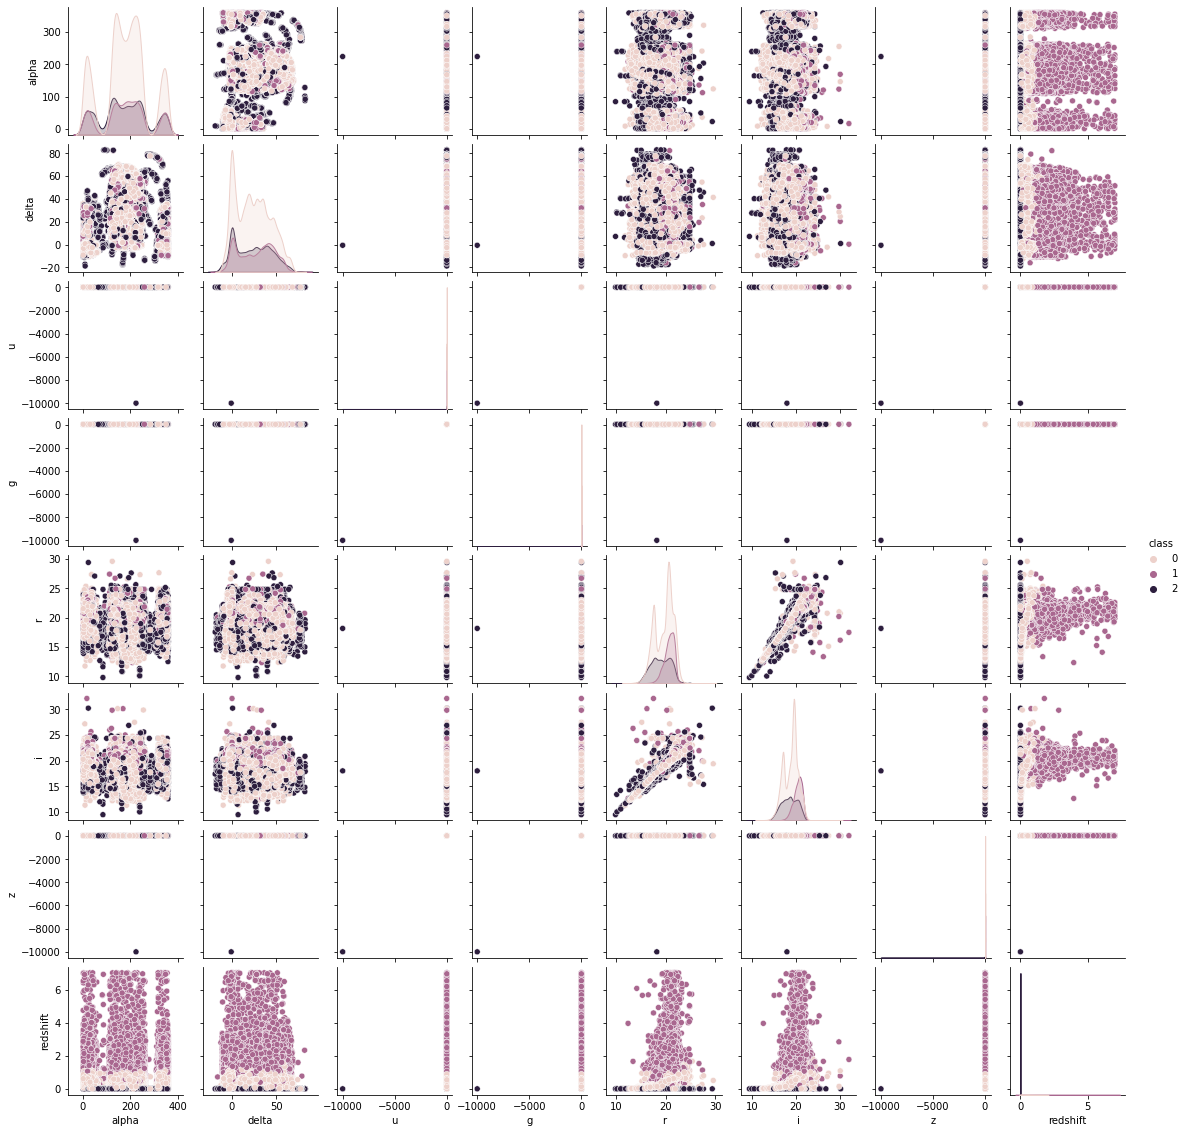

In [15]:
#Pair Plot which describes relation between each variables
sns.pairplot(data=df, vars=['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift'], hue='class', height=2)
plt.show()


<AxesSubplot:ylabel='Frequency'>

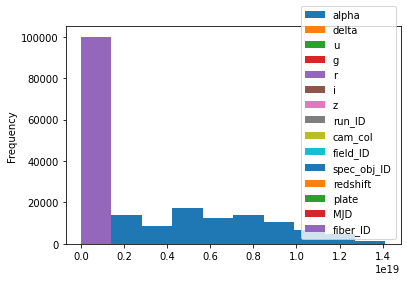

In [16]:
# histogram of Class (target variable)
df.plot(kind='hist',x = 'class')

In [17]:
x = df.drop('class',axis='columns')
y = df['class']

In [18]:
# spliting test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)

# normalized standard scaling
scaler = StandardScaler()
x_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

In [19]:
# Converting into 3d Tensor
y_scl = to_categorical(y_train, num_classes=3)
y_test_scl = to_categorical(y_test, num_classes=3)


In [20]:
# tarining MLP Model
model = Sequential([
    Dense(64, activation='relu', input_dim=15), #Input layer
    Dropout(0.2),
    Dense(32, activation='relu'),# hidden layer
    Dropout(0.2),
    Dense(16, activation='sigmoid'),# hidden layer
    Dropout(0.2),
    Dense(3, activation='softmax')# output layer
])
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Compilation and fitting model with early stoping & check point
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_scl,y_scl,epochs=20,validation_split=0.35,callbacks=[early_stop, checkpoint],validation_data=[x_test_scl,y_test_scl])



Epoch 1/20
2162/2188 [============================>.] - ETA: 0s - loss: 0.3822 - accuracy: 0.8594
Epoch 1: val_accuracy improved from -inf to 0.94880, saving model to best_model.h5
2188/2188 [==============================] - 6s 2ms/step - loss: 0.3805 - accuracy: 0.8602 - val_loss: 0.1681 - val_accuracy: 0.9488
Epoch 2/20
2175/2188 [============================>.] - ETA: 0s - loss: 0.2006 - accuracy: 0.9393
Epoch 2: val_accuracy improved from 0.94880 to 0.95903, saving model to best_model.h5
2188/2188 [==============================] - 4s 2ms/step - loss: 0.2004 - accuracy: 0.9394 - val_loss: 0.1345 - val_accuracy: 0.9590
Epoch 3/20
2184/2188 [============================>.] - ETA: 0s - loss: 0.1695 - accuracy: 0.9495
Epoch 3: val_accuracy improved from 0.95903 to 0.96107, saving model to best_model.h5
2188/2188 [==============================] - 4s 2ms/step - loss: 0.1694 - accuracy: 0.9495 - val_loss: 0.1248 - val_accuracy: 0.9611
Epoch 4/20
2163/2188 [============================>.

In [21]:
# finding loss and Accuracy
loss, accuracy = model.evaluate(x_test_scl, y_test_scl)
print(loss,accuracy)

938/938 [==============================] - 1s 1ms/step - loss: 0.1010 - accuracy: 0.9687
0.1009926050901413 0.9687333106994629


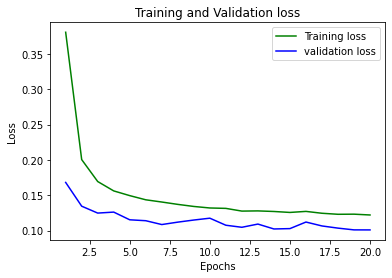

In [22]:
# plotting Loss 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

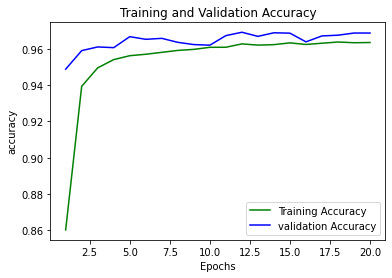

In [23]:
# plotting Accuracy
loss_accu = history.history['accuracy']
loss_val_accu = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_accu, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val_accu, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [24]:
# Reshape data to be compatible with LSTM input
x_scl_lstm = np.reshape(x_scl, (x_scl.shape[0], 1, x_scl.shape[1]))
x_test_scl_lstm = np.reshape(x_test_scl, (x_test_scl.shape[0], 1, x_test_scl.shape[1]))

model = Sequential([
    LSTM(128, input_shape=(x_scl_lstm.shape[1], x_scl_lstm.shape[2]), activation='tanh', return_sequences=True), #LSTM input layer
    Dropout(0.2),
    LSTM(64, activation='tanh'), # hidden LSTM layer
    Dense(3, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

hist = model.fit(x_scl_lstm, y_scl, epochs=20, validation_split=0.35, batch_size=64, callbacks=[early_stop],validation_data=(x_test_scl_lstm, y_test_scl))

Epoch 1/20
1094/1094 [==============================] - 12s 7ms/step - loss: 0.2735 - accuracy: 0.9060 - val_loss: 0.1374 - val_accuracy: 0.9568
Epoch 2/20
1094/1094 [==============================] - 7s 7ms/step - loss: 0.1423 - accuracy: 0.9544 - val_loss: 0.1232 - val_accuracy: 0.9623
Epoch 3/20
1094/1094 [==============================] - 7s 7ms/step - loss: 0.1311 - accuracy: 0.9582 - val_loss: 0.1192 - val_accuracy: 0.9632
Epoch 4/20
1094/1094 [==============================] - 7s 7ms/step - loss: 0.1250 - accuracy: 0.9602 - val_loss: 0.1120 - val_accuracy: 0.9654
Epoch 5/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.1191 - accuracy: 0.9632 - val_loss: 0.1150 - val_accuracy: 0.9632
Epoch 6/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.1151 - accuracy: 0.9641 - val_loss: 0.1047 - val_accuracy: 0.9682
Epoch 7/20
1094/1094 [==============================] - 7s 7ms/step - loss: 0.1118 - accuracy: 0.9648 - val_loss: 0.1068 - val_accuracy

In [25]:
loss, accuracy = model.evaluate(x_test_scl_lstm, y_test_scl)
print(loss,accuracy)

938/938 [==============================] - 2s 2ms/step - loss: 0.0949 - accuracy: 0.9712
0.0949387177824974 0.9711666703224182


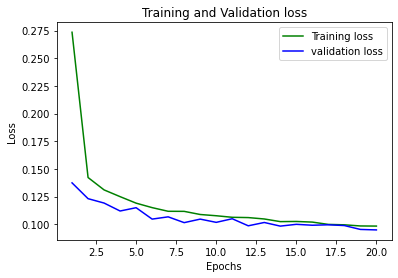

In [26]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

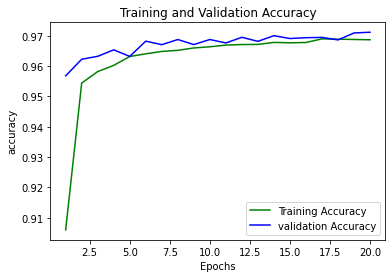

In [27]:
loss_accu = hist.history['accuracy']
loss_val_accu = hist.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_accu, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val_accu, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [28]:
# Reshape data to be compatible with CNN input
x_scl = x_scl.reshape(-1, 15, 1)
x_test_scl = x_test_scl.reshape(-1, 15, 1)


model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(15, 1)),#1d Convolutional Layer
    MaxPooling1D(pool_size=2), #maxpooling maximum values of patches
    Dropout(0.2),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(16, activation='sigmoid'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_scl, y_scl, epochs=20, validation_split=0.35, callbacks=[early_stop, checkpoint], validation_data=(x_test_scl, y_test_scl))


Epoch 1/20
2170/2188 [============================>.] - ETA: 0s - loss: 0.5653 - accuracy: 0.7604
Epoch 1: val_accuracy improved from -inf to 0.86460, saving model to best_model.h5
2188/2188 [==============================] - 8s 3ms/step - loss: 0.5645 - accuracy: 0.7609 - val_loss: 0.3525 - val_accuracy: 0.8646
Epoch 2/20
2184/2188 [============================>.] - ETA: 0s - loss: 0.3914 - accuracy: 0.8434
Epoch 2: val_accuracy improved from 0.86460 to 0.89907, saving model to best_model.h5
2188/2188 [==============================] - 7s 3ms/step - loss: 0.3912 - accuracy: 0.8434 - val_loss: 0.2773 - val_accuracy: 0.8991
Epoch 3/20
2184/2188 [============================>.] - ETA: 0s - loss: 0.3394 - accuracy: 0.8701
Epoch 3: val_accuracy improved from 0.89907 to 0.92040, saving model to best_model.h5
2188/2188 [==============================] - 8s 3ms/step - loss: 0.3395 - accuracy: 0.8701 - val_loss: 0.2350 - val_accuracy: 0.9204
Epoch 4/20
2179/2188 [============================>.

In [29]:
loss, accuracy = model.evaluate(x_test_scl, y_test_scl)
print(loss,accuracy)

938/938 [==============================] - 1s 1ms/step - loss: 0.1423 - accuracy: 0.9553
0.1423497051000595 0.9552666544914246


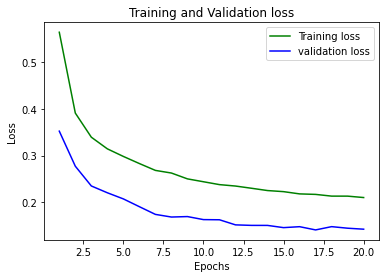

In [30]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

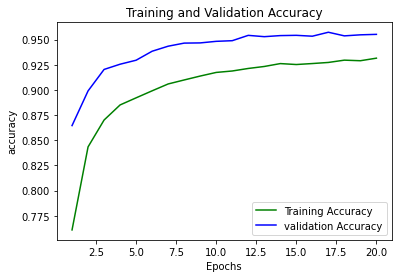

In [31]:
loss_accu = history.history['accuracy']
loss_val_accu = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_accu, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val_accu, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()